In [10]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons


In [11]:
import seaborn as sns

In [19]:
x,y=make_moons(n_samples=1000,noise=0.2)

In [20]:
df={"x1":x[:,0],"x2":x[:,1],"y":y}

In [21]:
dataset=pd.DataFrame(df)

In [22]:
dataset

,x1,x2,y
0,1.934303,0.246332,1
1,1.795583,-0.227536,1
2,1.341588,-0.100084,1
3,0.123500,1.075404,0
4,0.204420,0.205686,1
...,...,...,...
995,1.953618,-0.102517,1
996,0.617275,0.613647,0
997,0.504302,0.954068,0
998,1.673679,-0.175532,1


<Axes: xlabel='x1', ylabel='x2'>

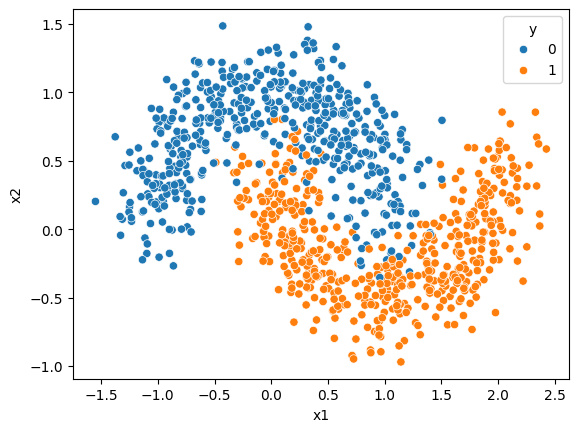

In [23]:
sns.scatterplot(x="x1",y="x2",hue="y",data=dataset)

In [25]:
x_a=dataset.iloc[:,:-1]
y_a=dataset['y']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [29]:
dt=DecisionTreeClassifier();
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.96

In [30]:
dt.score(x_train,y_train)

1.0

In [31]:
sv=SVC()
sv.fit(x_train,y_train)
sv.score(x_test,y_test)

0.955

In [32]:
sv.score(x_train,y_train)

0.96375

In [33]:
gnb=GaussianNB()

In [34]:
gnb.fit(x_train,y_train)


GaussianNB()

In [35]:
gnb.score(x_test,y_test)

0.895

In [36]:
gnb.score(x_train,y_train)

0.8625

In [37]:
from sklearn.ensemble import VotingClassifier

In [38]:
li=[('dt',dt),('sv',sv),('gnb',gnb)]

In [47]:
vc=VotingClassifier(estimators=li,voting='hard',weights=[5,4,7])


In [48]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()), ('sv', SVC()),
                             ('gnb', GaussianNB())],
                 weights=[5, 4, 7])

In [49]:
vc.score(x_test,y_test)

0.955

In [50]:
vc.score(x_train,y_train)

0.97

In [53]:
prd={"dt":dt.predict(x_test),"sv":sv.predict(x_test),"gnb":gnb.predict(x_test),"vc":vc.predict(x_test)}

In [54]:
pd.DataFrame(prd)

,dt,sv,gnb,vc
0,0,0,0,0
1,1,1,1,1
2,0,0,0,0
3,0,0,0,0
4,1,1,1,1
...,...,...,...,...
195,0,0,0,0
196,1,1,1,1
197,0,0,0,0
198,0,0,0,0
